In [1]:
# importing package 
import matplotlib.pyplot as plt 
import numpy as np
import pickle
import matplotlib as mpl

## plotting decorr_result
runs after running decorr_result and relies on pickled files inside raw_data

In [3]:
decorr_sessions = [
    # H1
    ['2024-02-13_H1_CL_1', 'CL_H1', 0],
    # H2
    ['2024-02-02_H2_CL_1', 'CL_H2', 0],
    ['2024-02-02_H2_CL_2', 'CL_H2', 0],
    # H4
    ['2024-03-01_H4_CL_1', 'CL_H4', 3],
    # 
    ['2024-02-12_S2_CL_1', 'CL_S2_2024-02-12', 2],
    ['2024-02-12_S2_CL_2', 'CL_S2_2024-02-12', 2],
    ['2024-02-21_S2_CL_2', 'CL_S2_2024-02-21_CL_2', 2],
    ['2024-02-21_S2_CL_5', 'CL_S2_2024-02-21', 0],
    ['2024-02-27_S2_CL_1', 'CL_S2_2024-02-27', 4],
]
titles = ['H1 Day T+0 CL_1', 'H2 Day T+0 CL_1', 'H2 Day T+0 CL_1', 'H4 Day T+0 CL_1', 'S2 Day T+0 CL_1', 'S2 Day T+0 CL_2', 'S2 Day T+2 CL_2', 'S2 Day T+2 CL_5', 'S2 Day T+4 CL_1']

decorr_details = []
n_cols = 3
for dataName, _, _ in decorr_sessions:

    fname = f'../../data/target_decoder_curve/{dataName}_rot_target_pred.pickle'
    with open(fname, 'rb') as f:
        detail = pickle.load(f)
    decorr_details.append(detail)

mean last validation accuracy: 0.07957700402853306
mean last validation accuracy: 0.1810533331169989


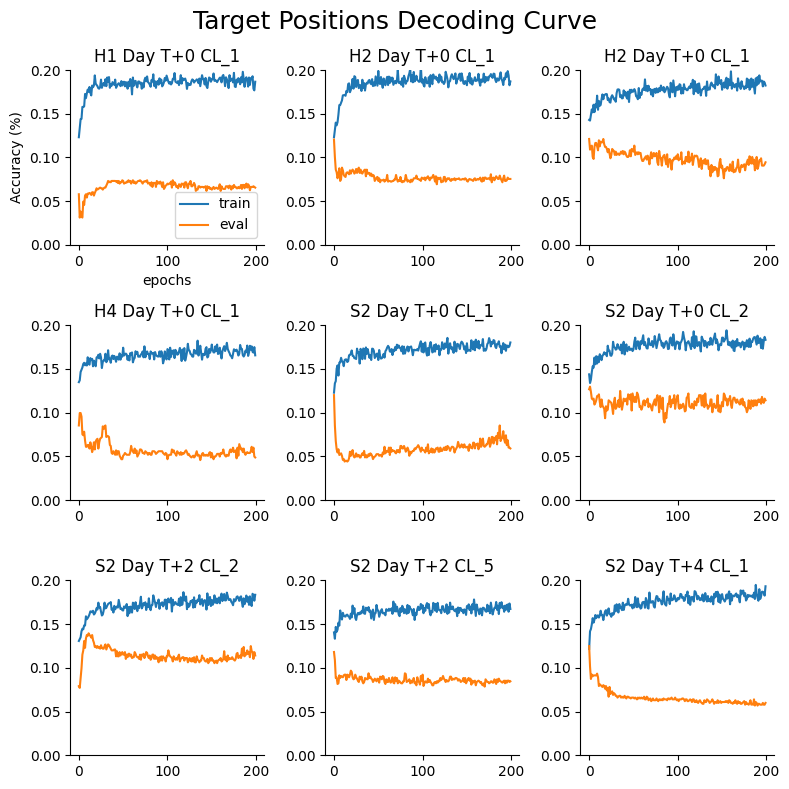

In [5]:
# derived parameter constant for figure
n_sessions = len(decorr_details)
n_rows = int(np.ceil(n_sessions/n_cols))

# figure plotting
fig = plt.figure(figsize=(8, 8))
fig.suptitle(' Target Positions Decoding Curve ', fontsize=18)
gs = plt.GridSpec(n_rows, n_cols, width_ratios=[1]*n_cols, height_ratios=[1]*n_rows)

last_val_accuracy = []
last_train_accuracy = []

for m, detail in enumerate(decorr_details):
    i, j = m//n_cols, m%n_cols
    ax = fig.add_subplot(gs[i, j])
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.ylim(0, 0.20)
    # plt.xticks(np.arange(n_folds))
    
    # create data 
    epochs = np.arange(len(detail['train acc']))
    train_acc = detail['train acc']
    val_acc = detail['val acc']

    plt.plot(epochs, train_acc, label='train')
    plt.plot(epochs, val_acc, label='eval') 
    
    if titles is not None:
        plt.title(titles[m])
    
    if m==0:
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel('Accuracy (%)')
    
    last_val_accuracy.append(val_acc[-1])
    last_train_accuracy.append(train_acc[-1])

mpl.rcParams['pdf.fonttype'] = 42
plt.tight_layout()
plt.savefig('../../figs/Target Decoder Curve/target_position_decoding_curve.pdf')

print('mean last validation accuracy:', np.mean(last_val_accuracy))
print('mean last validation accuracy:', np.mean(last_train_accuracy))